# **기계학습(F123) 6조**
#### 김영규, 권영후, 김민아, 김현욱, 용상우, 이유경

# **Spotify Dataset 이용**

## **분석할 내용**
   
**1) 어떤 속성/특성이 노래의 인기에 영향을 미칠 것인가?**

**2) 가장 인기 있는 곡과 아티스트는 무엇인가?**

**3) 좋아하는 노래를 입력하면, 그 곡과 비슷한 취향 저격 노래 추천**

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

## 데이터 불러오기

In [2]:
df = pd.read_csv('all_songs.csv')
df

,id,year,artists,name,popularity,valence,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,1921,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,0.0594,831667,0.98200,0.279,0.211,0.878000,10,0.665,-20.096,1,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,1921,['Dennis Day'],Clancy Lowered the Boom,5,0.9630,180533,0.73200,0.819,0.341,0.000000,7,0.160,-12.441,1,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,1921,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,5,0.0394,500062,0.96100,0.328,0.166,0.913000,3,0.101,-14.850,1,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,1921,['Frank Parker'],Danny Boy,3,0.1650,210000,0.96700,0.275,0.309,0.000028,5,0.381,-9.316,1,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,1921,['Phil Regan'],When Irish Eyes Are Smiling,2,0.2530,166693,0.95700,0.418,0.193,0.000002,3,0.229,-10.096,1,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173621,1qosh64U6CR5ki1g1Rf2dZ,2023,AKMU,Love Lee,80,0.7060,179683,0.45300,0.914,0.532,0.000005,5,0.169,-6.600,0,0.0734,100.029
173622,1ZAUJfeyXVwmcqu5qX7A0e,2023,Jay Hound,UKRAINE,69,0.0647,130776,0.00378,0.905,0.364,0.000145,1,0.112,-10.206,1,0.3720,124.970
173623,1wB4su0ngpr8Rnh96So3vJ,2023,Bella White,Burn Me Once - from The Hunger Games: The Ball...,63,0.3460,200022,0.83900,0.736,0.202,0.000000,10,0.107,-10.286,1,0.0334,114.351
173624,0ArVfVP8B5svkfj8clHNzB,2023,Drake,Screw The World - Interlude,71,0.6290,112093,0.06440,0.823,0.642,0.714000,1,0.105,-5.922,1,0.2580,146.781


In [3]:
df.columns

Index(['id', 'year', 'artists', 'name', 'popularity', 'valence', 'duration_ms',
       'acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo'],
      dtype='object')

In [4]:
df.describe()

,year,popularity,valence,duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
count,173626.000000,173626.000000,173626.000000,1.736260e+05,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000,173626.000000
mean,1977.561517,32.161629,0.527571,2.302662e+05,0.498270,0.539022,0.484594,0.165242,5.200183,0.205460,-11.404168,0.705914,0.098526,116.957257
std,26.356339,22.370640,0.262969,1.253700e+05,0.375768,0.176456,0.267123,0.312366,3.516821,0.174324,5.708028,0.455632,0.161928,30.699723
min,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,1956.000000,12.000000,0.316000,1.695330e+05,0.098900,0.417000,0.258000,0.000000,2.000000,0.098800,-14.543000,0.000000,0.035000,93.503000
50%,1978.000000,34.000000,0.538000,2.069600e+05,0.506000,0.550000,0.475000,0.000193,5.000000,0.135000,-10.488000,1.000000,0.045100,114.890000
75%,2000.000000,49.000000,0.746000,2.614930e+05,0.890000,0.670000,0.705000,0.095200,8.000000,0.260000,-7.103000,1.000000,0.076300,135.746000
max,2023.000000,100.000000,1.000000,5.403500e+06,0.996000,0.988000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.970000,243.507000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173626 entries, 0 to 173625
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                173626 non-null  object 
 1   year              173626 non-null  int64  
 2   artists           173626 non-null  object 
 3   name              173626 non-null  object 
 4   popularity        173626 non-null  int64  
 5   valence           173626 non-null  float64
 6   duration_ms       173626 non-null  int64  
 7   acousticness      173626 non-null  float64
 8   danceability      173626 non-null  float64
 9   energy            173626 non-null  float64
 10  instrumentalness  173626 non-null  float64
 11  key               173626 non-null  int64  
 12  liveness          173626 non-null  float64
 13  loudness          173626 non-null  float64
 14  mode              173626 non-null  int64  
 15  speechiness       173626 non-null  float64
 16  tempo             17

## 변수 설명

id: 곡의 Spotify 식별자  

year: 곡이 발매된 년도

artists: 곡을 수행한 아티스트의 이름. 여러 아티스트가 있다면 ;로 구분됨  

name : 곡의 이름

**popularity**: 곡의 인기도. 0에서 100까지의 값으로, 100이 가장 인기가 높다.   
곡이 재생된 총 횟수와 그 재생이 얼마나 최근에 이루어졌는지를 기반으로 책정됨.   
일반적으로 현재 많이 재생되는 노래일수록 더 높은 인기도를 가짐.

valence: 음악이 얼마나 긍정적인지를 나타내며, 0에서 1까지의 값을 가짐.   
값이 높을수록 더 긍정적으로 들리며(행복, 즐거움, 유쾌), 값이 낮을수록 더 부정적으로 들림(슬픔, 우울, 분노).

duration_ms: 곡의 길이(밀리초 단위)

acousticness: 곡이 어쿠스틱인지를 나타내며, 0에서 1까지의 값을 가짐.

danceability: 곡이 춤추기에 얼마나 적합한지를 나타내며, 0에서 1까지의 값을 가짐.   
템포, 리듬 안정성, 비트 강도 및 전반적인 규칙성을 기반으로 책정됨.

energy: 곡이 얼마나 강력하고 활동적인지를 나타내며, 0에서 1까지의 값을 가짐.   
에너지가 높은 곡일수록 빠르고 시끄럽게 느껴짐.

instrumentalness: 곡에 보컬이 포함되었는지를 예측하는 값.   
"우"와 "아" 소리는 악기로 처리되며, 랩은 보컬로 간주됨.

key: 곡의 음계를 수치로 나타냄.   
(예: 0은 C, 1은 C♯/D♭, 2는 D 등. 키가 감지되지 않은 경우 -1)

liveness: 곡이 라이브 공연인지를 나타냄.   
관객의 존재를 감지하여 책정하며, 값이 높을수록 라이브 공연일 확률이 높아짐.

loudness: 곡의 전체 음량 (데시벨)

mode: 곡이 단조인지 장조인지 나타냄.   
장조: 1, 단조: 0   
   
speechiness: 곡에서 말이 나온 정도를 나타냄.   
곡이 대화와 유사할수록(예: 토크 쇼, 오디오 북, 시) 값이 1에 가까워짐. 

tempo: 분당 비트 수(BPM)로 나타낸 전체 추정 템포   장르

## 데이터 전처리
- duration_ms: 단위를 밀리초 → 분으로 변경
- artists: 아티스트 이름에 있는 기호 제거
- 10년 단위로 구분
- id 제거 후 중복된 행 제거

In [6]:
# 아티스트 이름에 포함돼 있는 기호 문자 제거
df['artists'] = df['artists'].str.replace("[","")
df['artists'] = df['artists'].str.replace("]","")
df['artists'] = df['artists'].str.replace("'","")

df['artists'].tail()

173621           AKMU
173622      Jay Hound
173623    Bella White
173624          Drake
173625       Rod Wave
Name: artists, dtype: object

In [7]:
# 곡의 길이를 밀리초 → 분 단위로 변경
df['duration_min'] = df['duration_ms'] / 60000
df['duration_min'] = df['duration_min'].round(2)
df.drop(columns=['duration_ms'], inplace=True)

df['duration_min'].tail()

173621    2.99
173622    2.18
173623    3.33
173624    1.87
173625    3.20
Name: duration_min, dtype: float64

In [8]:
# 발매 년도를 10년 단위로 구분 → 최근 인기를 얻는 노래의 특성 파악을 위해

df['Song Decade'] = None

df.loc[(df['year'] >= 1920) & (df['year'] < 1930), 'Song Decade'] = '1920s'
df.loc[(df['year'] >= 1930) & (df['year'] < 1940), 'Song Decade'] = '1930s'
df.loc[(df['year'] >= 1940) & (df['year'] < 1950), 'Song Decade'] = '1940s'
df.loc[(df['year'] >= 1950) & (df['year'] < 1960), 'Song Decade'] = '1950s'
df.loc[(df['year'] >= 1960) & (df['year'] < 1970), 'Song Decade'] = '1960s'
df.loc[(df['year'] >= 1970) & (df['year'] < 1980) , 'Song Decade'] = '1970s'
df.loc[(df['year'] >= 1980) & (df['year'] < 1990) , 'Song Decade'] = '1980s'
df.loc[(df['year'] >= 1990) & (df['year'] < 2000) , 'Song Decade'] = '1990s'
df.loc[(df['year'] >= 2000) & (df['year'] < 2010) , 'Song Decade'] = '2000s'
df.loc[(df['year'] >= 2010) & (df['year'] < 2020) , 'Song Decade'] = '2010s'
df.loc[(df['year'] >= 2020) & (df['year'] < 2030) , 'Song Decade'] = '2020s'

df.tail()

,id,year,artists,name,popularity,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,duration_min,Song Decade
173621,1qosh64U6CR5ki1g1Rf2dZ,2023,AKMU,Love Lee,80,0.7060,0.45300,0.914,0.532,0.000005,5,0.169,-6.600,0,0.0734,100.029,2.99,2020s
173622,1ZAUJfeyXVwmcqu5qX7A0e,2023,Jay Hound,UKRAINE,69,0.0647,0.00378,0.905,0.364,0.000145,1,0.112,-10.206,1,0.3720,124.970,2.18,2020s
173623,1wB4su0ngpr8Rnh96So3vJ,2023,Bella White,Burn Me Once - from The Hunger Games: The Ball...,63,0.3460,0.83900,0.736,0.202,0.000000,10,0.107,-10.286,1,0.0334,114.351,3.33,2020s
173624,0ArVfVP8B5svkfj8clHNzB,2023,Drake,Screw The World - Interlude,71,0.6290,0.06440,0.823,0.642,0.714000,1,0.105,-5.922,1,0.2580,146.781,1.87,2020s
173625,7AFApnZCpYBlq2R2lpVfUb,2023,Rod Wave,Pass You By,67,0.3060,0.50000,0.604,0.695,0.000018,8,0.112,-7.560,1,0.0355,77.447,3.20,2020s


In [9]:
# id 컬럼 때문에 중복 값이 있음에도 불구하고 항상 중복이 아니라고 나옴.
# 고유번호인 id 컬럼 제거
df.drop(columns=['id'], inplace=True)

# 이제 중복된 값이 나타남.
df.duplicated().sum()

597

In [10]:
# 중복된 레코드 제거
df = df[~df.duplicated()==1]
df.shape

(173029, 17)

## EDA

In [11]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

<Axes: xlabel='mode', ylabel='Density'>

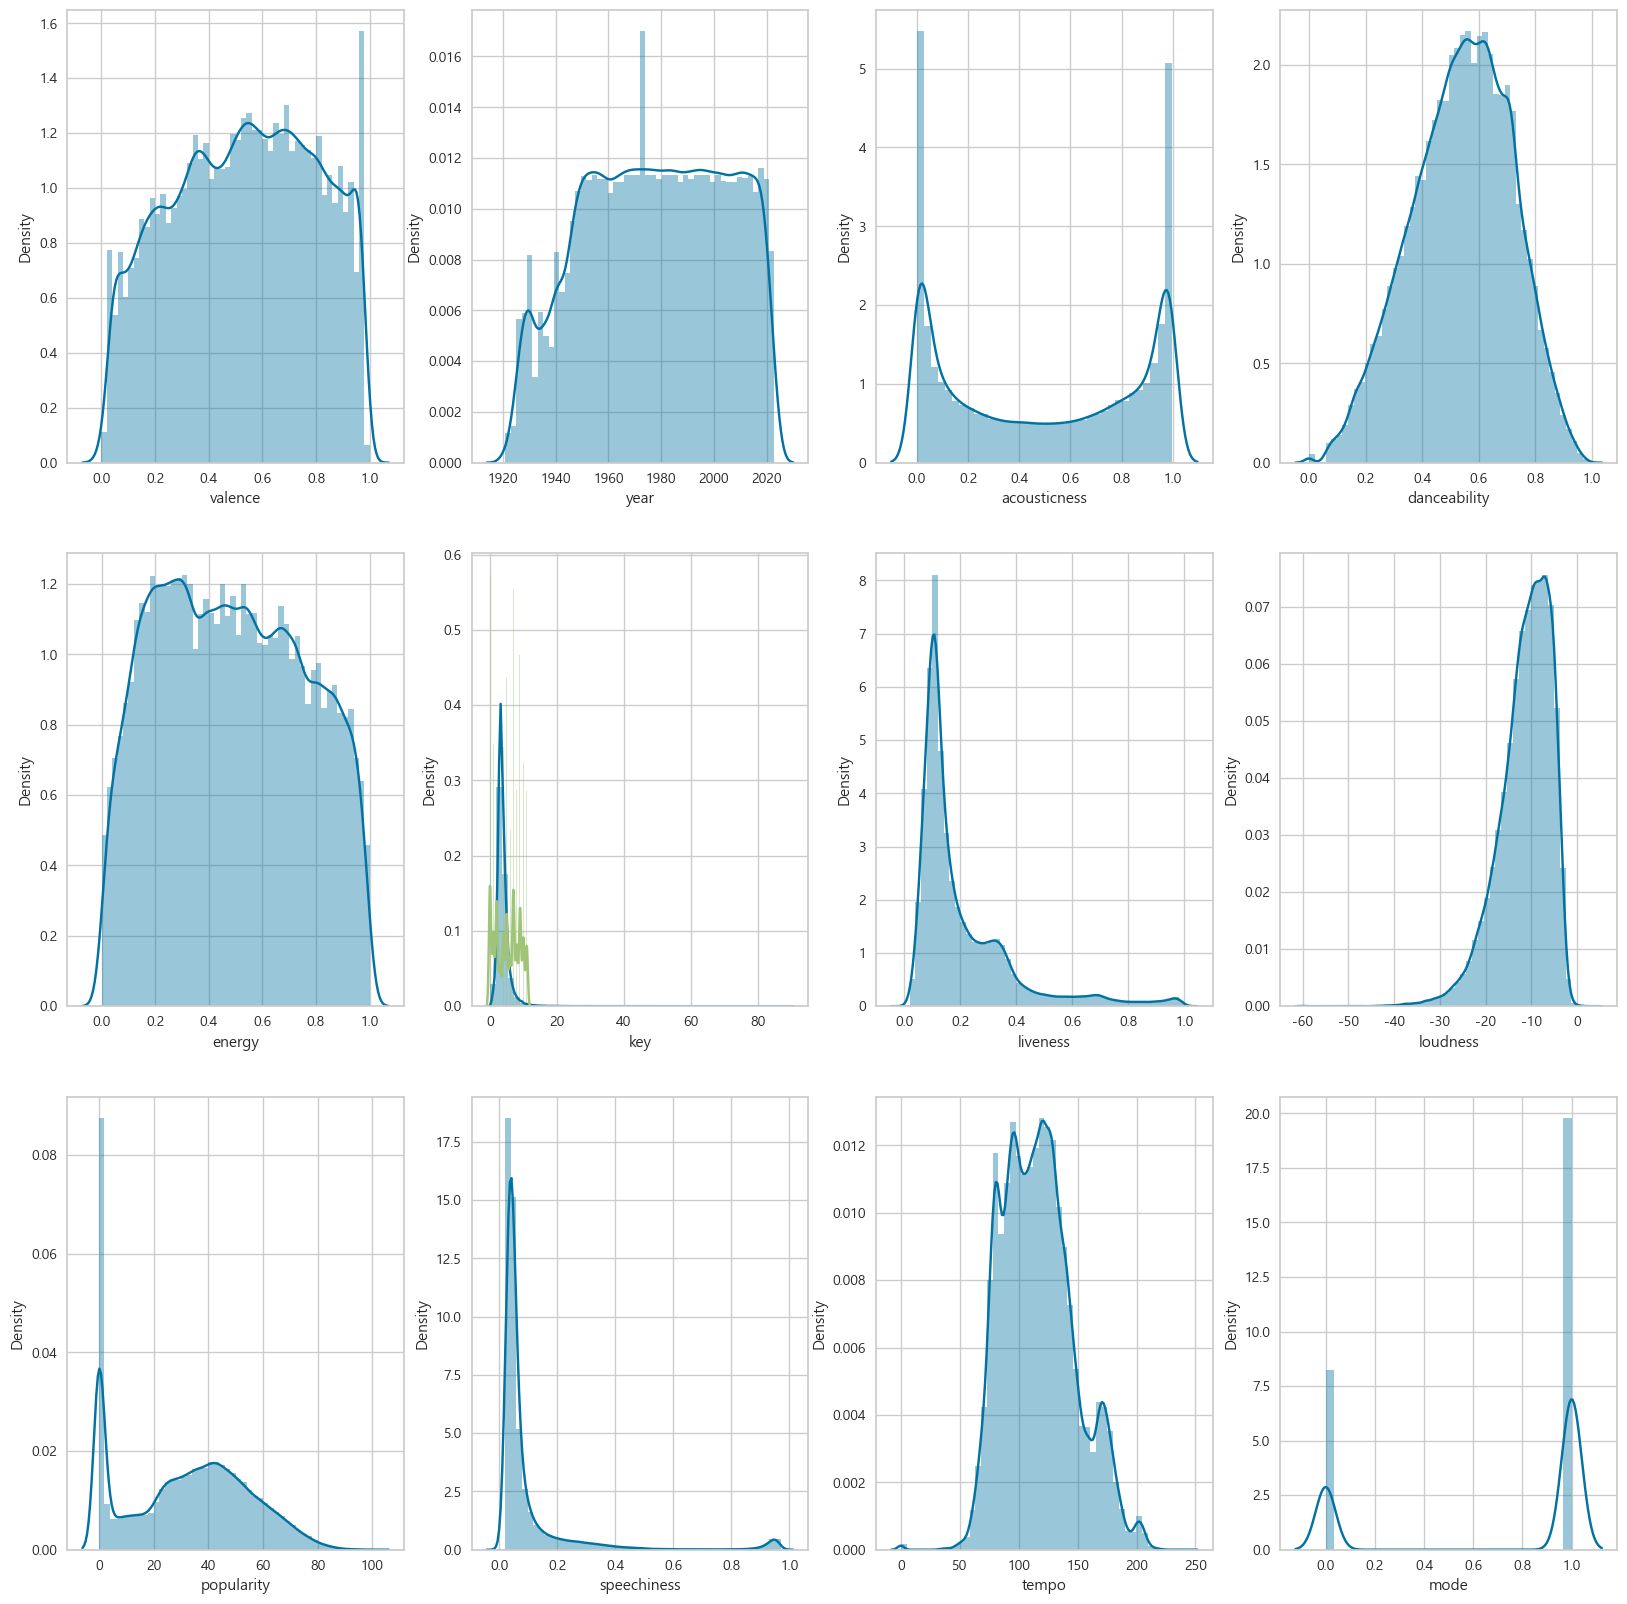

In [12]:
# 각 변수의 분포 시각화
fig,ax = plt.subplots(3,4,figsize=(20,20))

sns.distplot(df['valence'],ax=ax[0,0])
sns.distplot(df['year'],ax=ax[0,1])
sns.distplot(df['acousticness'],ax=ax[0,2])
sns.distplot(df['danceability'],ax=ax[0,3])
sns.distplot(df['duration_min'],ax=ax[1,1])
sns.distplot(df['energy'],ax=ax[1,0])
sns.distplot(df['key'],ax=ax[1,1])
sns.distplot(df['liveness'],ax=ax[1,2])
sns.distplot(df['loudness'],ax=ax[1,3])
sns.distplot(df['popularity'],ax=ax[2,0])
sns.distplot(df['speechiness'],ax=ax[2,1])
sns.distplot(df['tempo'],ax=ax[2,2])
sns.distplot(df['mode'],ax=ax[2,3])

<Axes: >

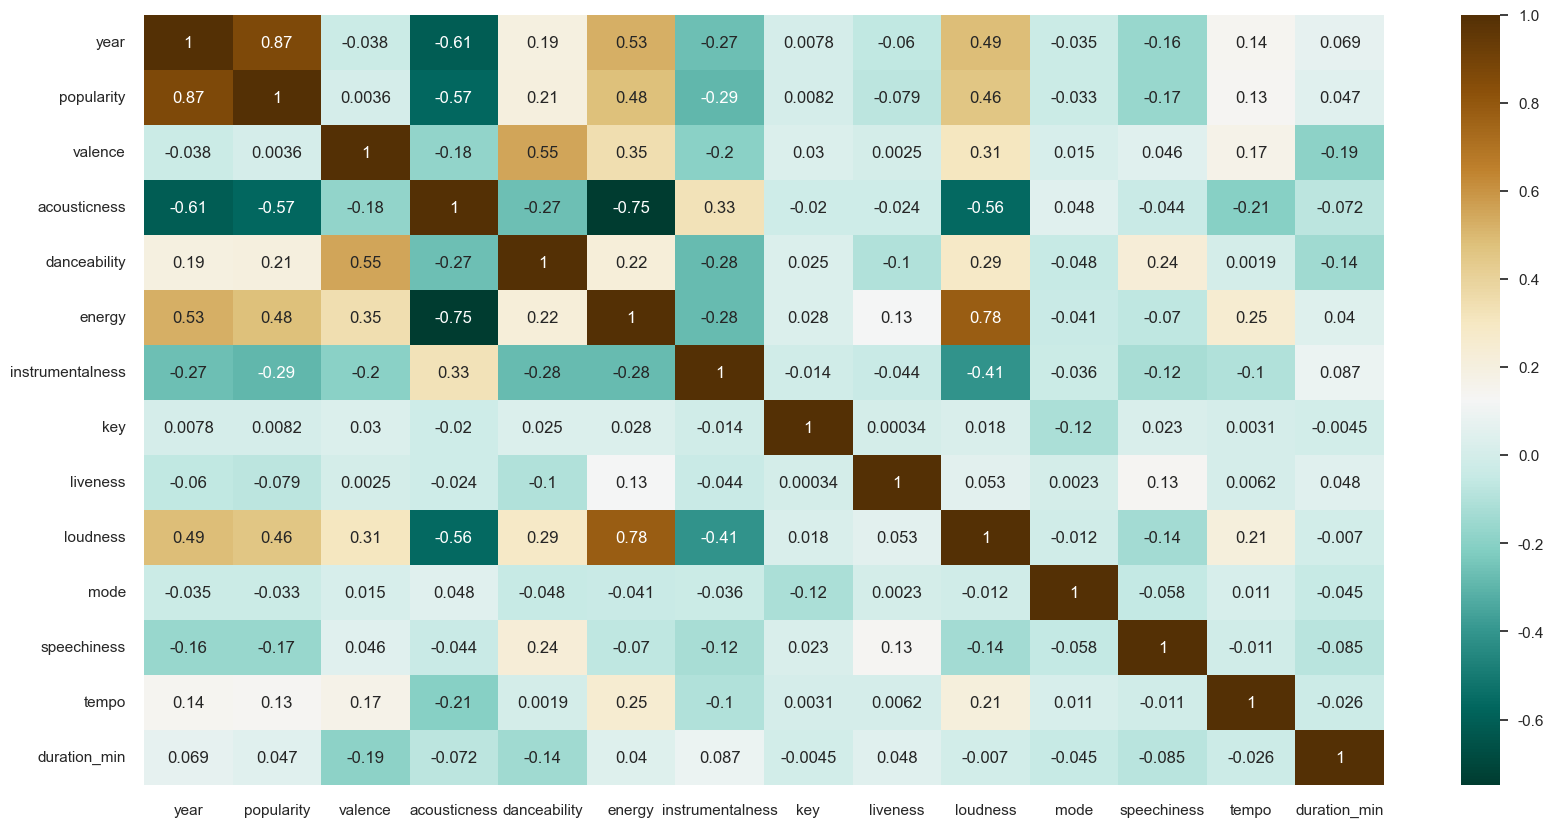

In [13]:
# 각 변수 간 Correlation을 확인하기 위한 히트맵
numeric_df = df.select_dtypes(include='number')  # 숫자를 값으로 가지는 열만 선택
corr = numeric_df.corr()

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.heatmap(corr,annot=True,cmap='BrBG_r',annot_kws={"fontsize":12})

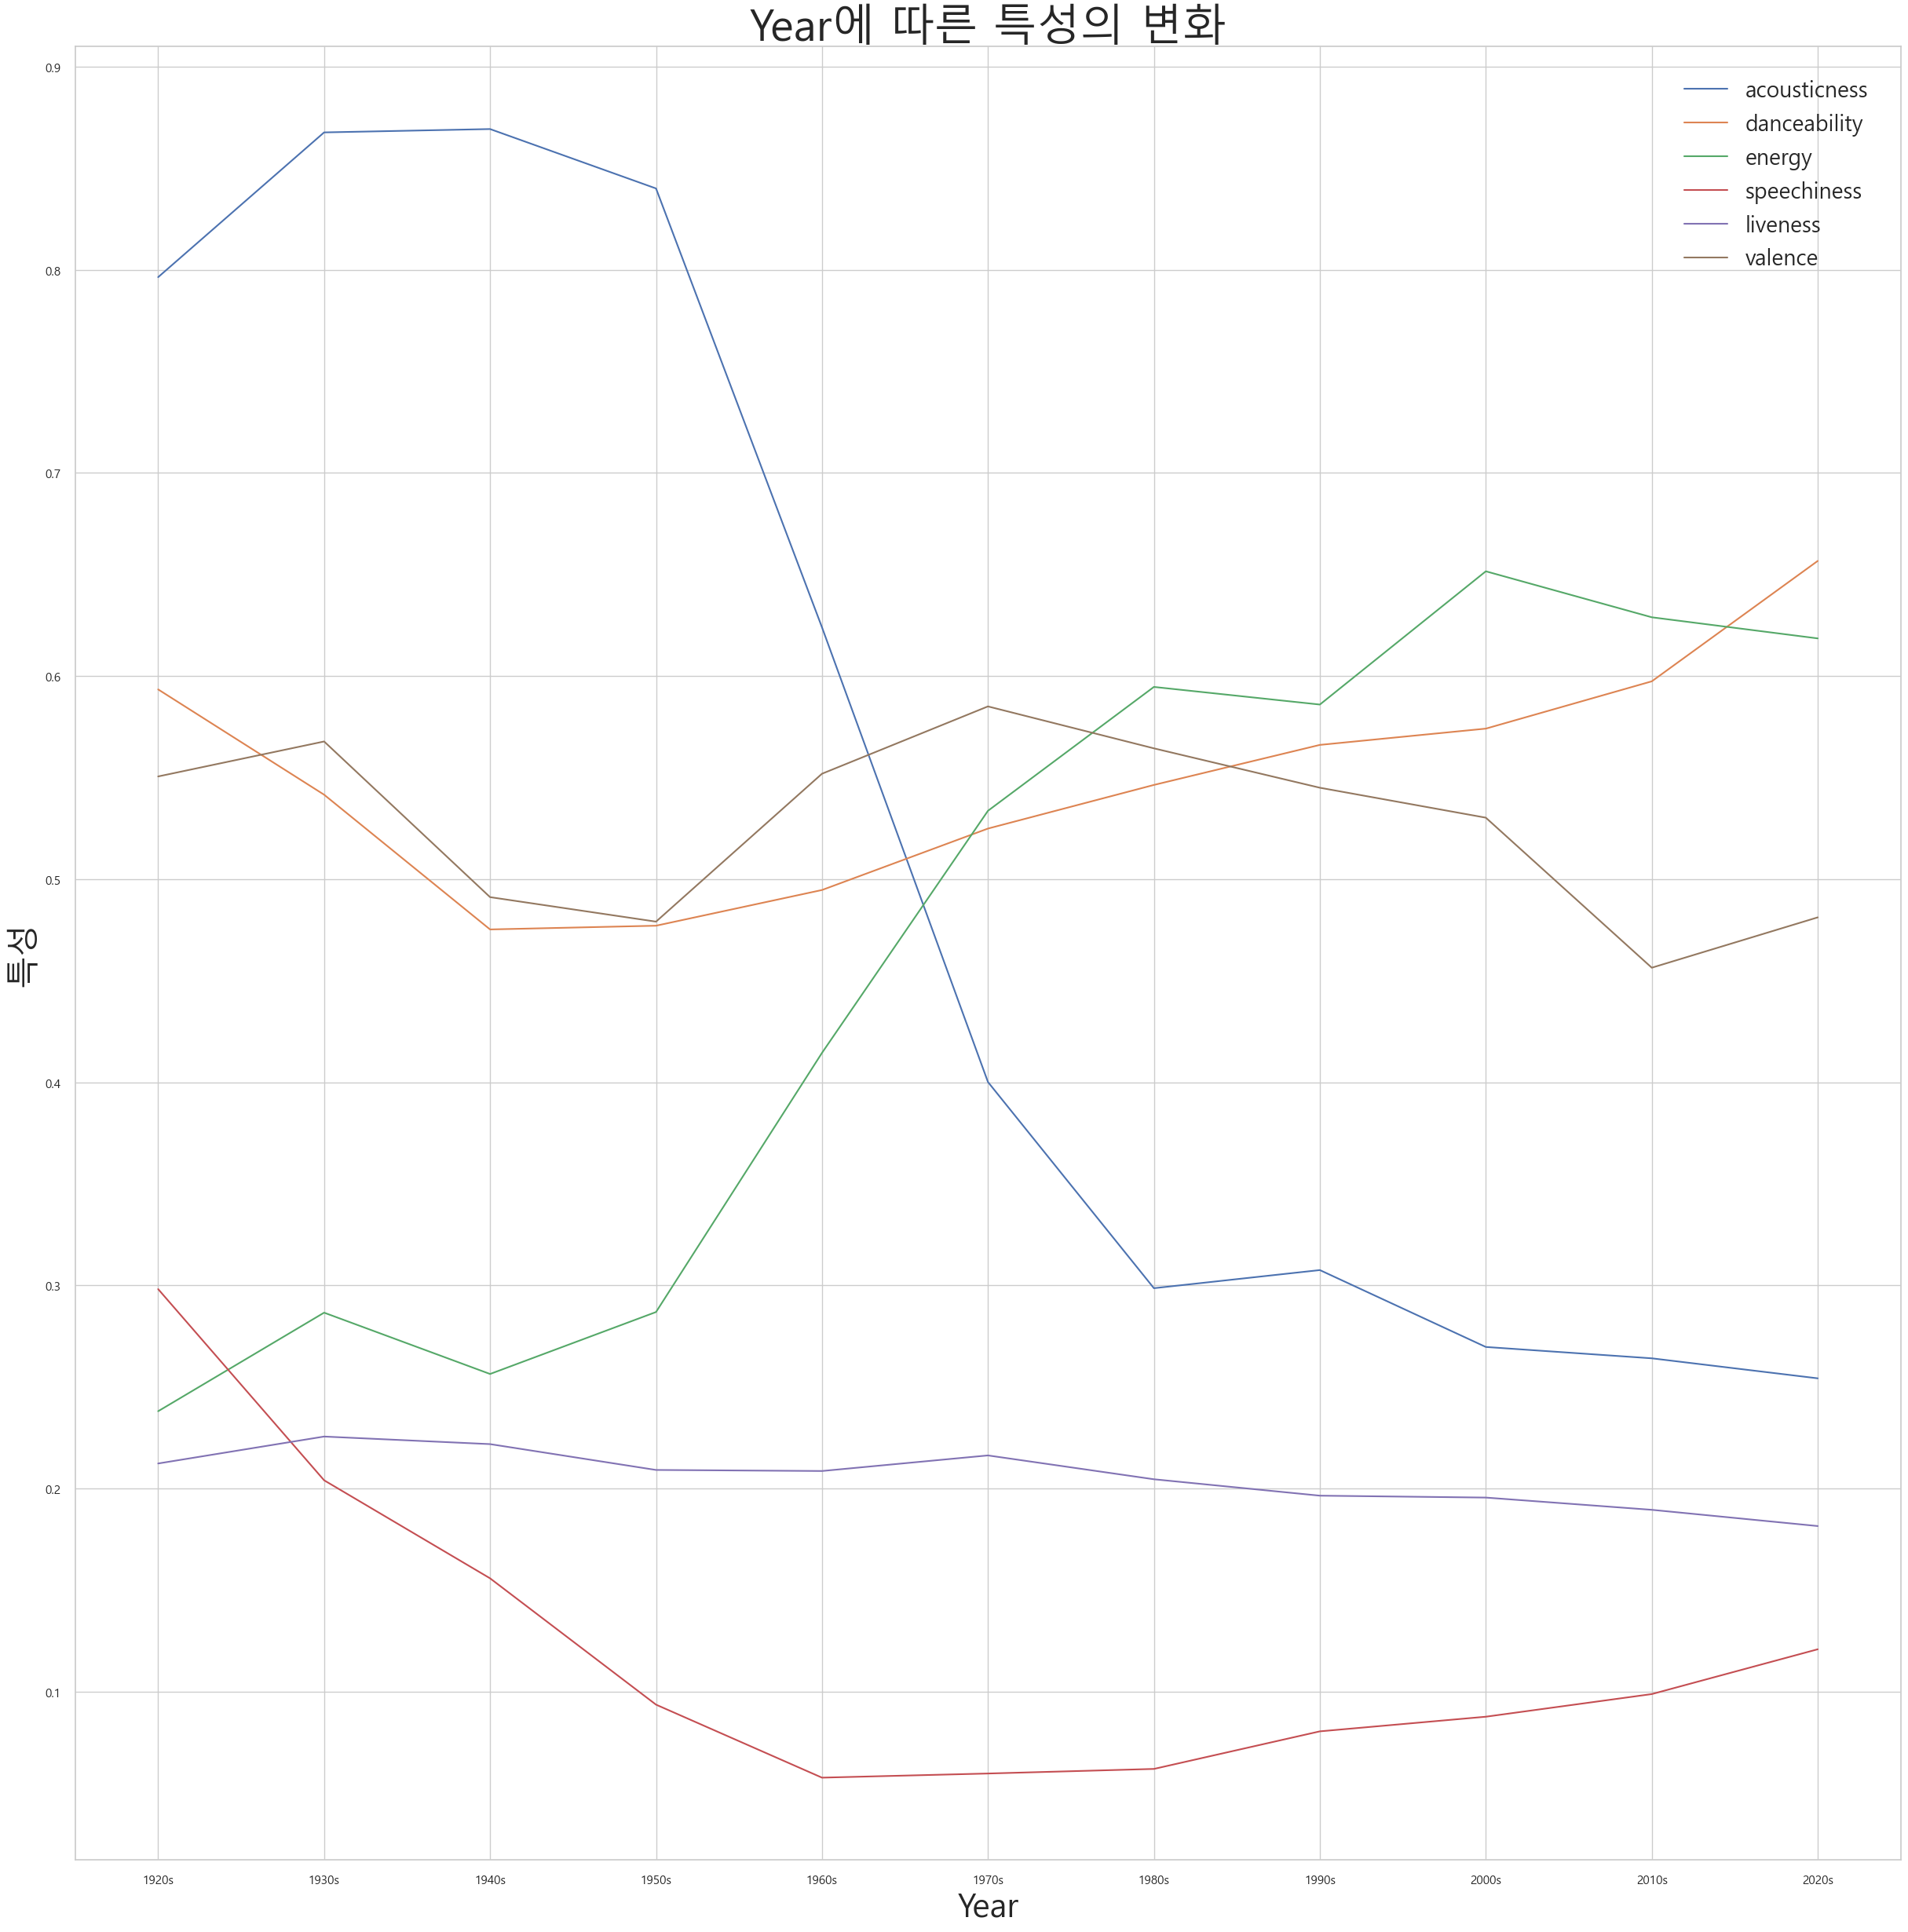

In [14]:
# Year에 따른 특성의 변화
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = df.groupby('Song Decade')[c].mean()
    sns.lineplot(x = x.index, y=x,label=c)
plt.title('Year에 따른 특성의 변화', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('특성',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 20}, loc = 'upper right')
plt.show()

### 관찰 결과
- popularity에 영향을 주는 변수들
    - year(+), acousticness(-), energy(+), loudness(+)
    - 에너지와 소리의 크기 사이에는 강한 긍정의 관계가 있으므로, 소리가 크면 에너제틱한 노래라고 할 수 있음
    - 최신곡일수록 어쿠스틱함이 떨어지며, 에너제틱함을 알 수 있음
    - 조금 더 범위를 넓혀보면, dancability(+)와 tempo(+)가 높은 곡들이 인기에 영향을 주는 것을 알 수 있다.

- Audio Feature의 특징
    - Acousticness가 급락하는 것을 볼 수 있음
    - Energy와 Danceability는 반면에 급상승하는 것을 볼 수 있음


**따라서**, 전세계적으로 사랑받기 위해서는 춤 추기 좋은, 에너제틱한 노래를 발매해야함을 알 수 있다. 

***아쉬운 점***: 
1. 아티스트의 인기(BTS, Justin Bieber 등)로 인한 Popularity는 반영이 되지 않은 것 같아 아쉬움
2. 발매연도가 너무 강하게 영향을 주는 것 같음

## 2020년대 Popularity Top 10 vs 올타임 Popularity Top 10

### 올타임 Popularity Top 15

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

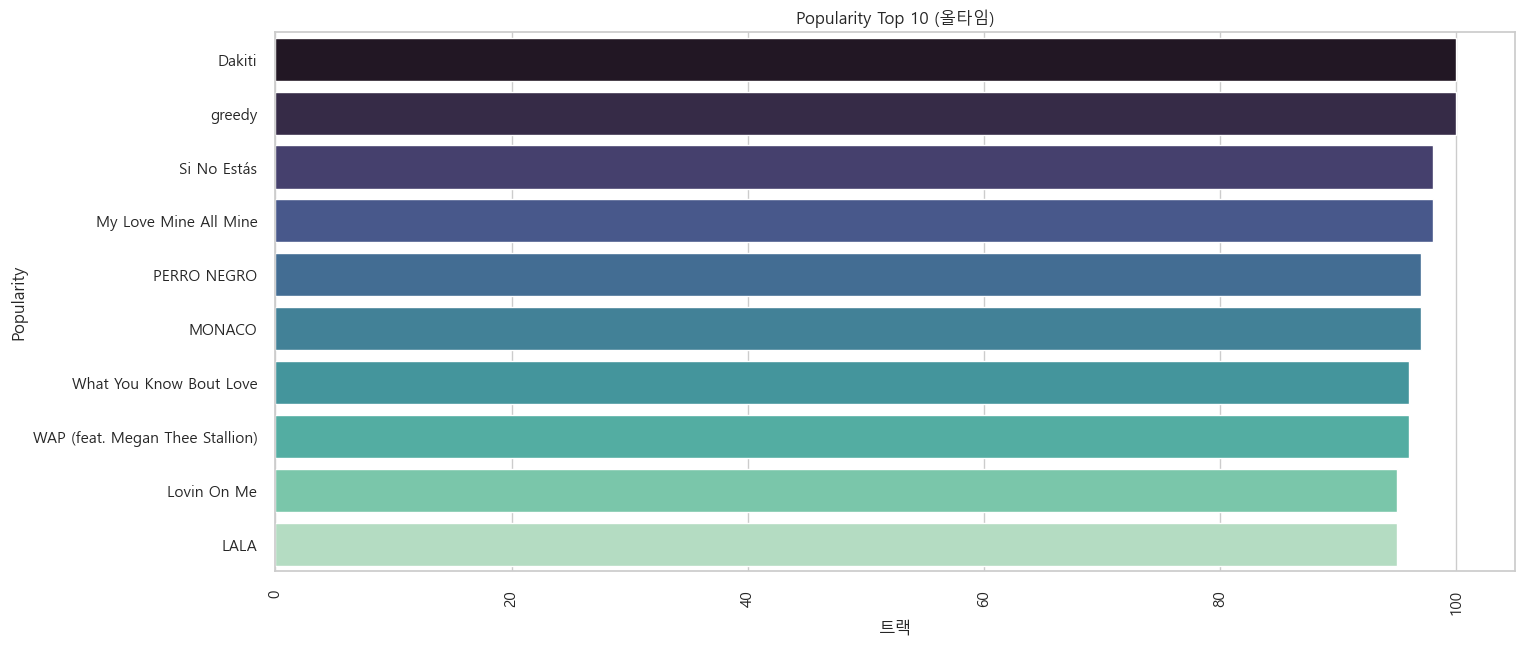

In [15]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=popular, y=popular.index, palette="mako",orient = 'h')
axis.set_title('Popularity Top 10 (올타임)')
axis.set_ylabel('Popularity')
axis.set_xlabel('트랙')
plt.xticks(rotation = 90)

### 2020년대 Popularity Top 10

In [16]:
# 2020년대 트랙들만 빼서 df를 새로 만듦
songs_2020s = df[df['Song Decade'] == '2020s']
songs_2020s

,year,artists,name,popularity,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,duration_min,Song Decade
19606,2020,"24kGoldn, iann dior",Mood (feat. iann dior),99,0.7560,0.22100,0.700,0.722,0.000000,7,0.2720,-3.558,0,0.0369,90.989,2.34,2020s
19607,2020,"Pop Smoke, Lil Baby, DaBaby",For The Night (feat. Lil Baby & DaBaby),95,0.3470,0.11400,0.823,0.586,0.000000,6,0.1930,-6.606,0,0.2000,125.971,3.17,2020s
19608,2020,"Cardi B, Megan Thee Stallion",WAP (feat. Megan Thee Stallion),96,0.3570,0.01940,0.935,0.454,0.000000,1,0.0824,-7.509,1,0.3750,133.073,3.13,2020s
19609,2020,"Drake, Lil Durk",Laugh Now Cry Later (feat. Lil Durk),93,0.5220,0.24400,0.761,0.518,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4.36,2020s
19610,2020,Ariana Grande,positions,96,0.6820,0.46800,0.737,0.802,0.000000,0,0.0931,-4.771,1,0.0878,144.015,2.87,2020s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173621,2023,AKMU,Love Lee,80,0.7060,0.45300,0.914,0.532,0.000005,5,0.1690,-6.600,0,0.0734,100.029,2.99,2020s
173622,2023,Jay Hound,UKRAINE,69,0.0647,0.00378,0.905,0.364,0.000145,1,0.1120,-10.206,1,0.3720,124.970,2.18,2020s
173623,2023,Bella White,Burn Me Once - from The Hunger Games: The Ball...,63,0.3460,0.83900,0.736,0.202,0.000000,10,0.1070,-10.286,1,0.0334,114.351,3.33,2020s
173624,2023,Drake,Screw The World - Interlude,71,0.6290,0.06440,0.823,0.642,0.714000,1,0.1050,-5.922,1,0.2580,146.781,1.87,2020s


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

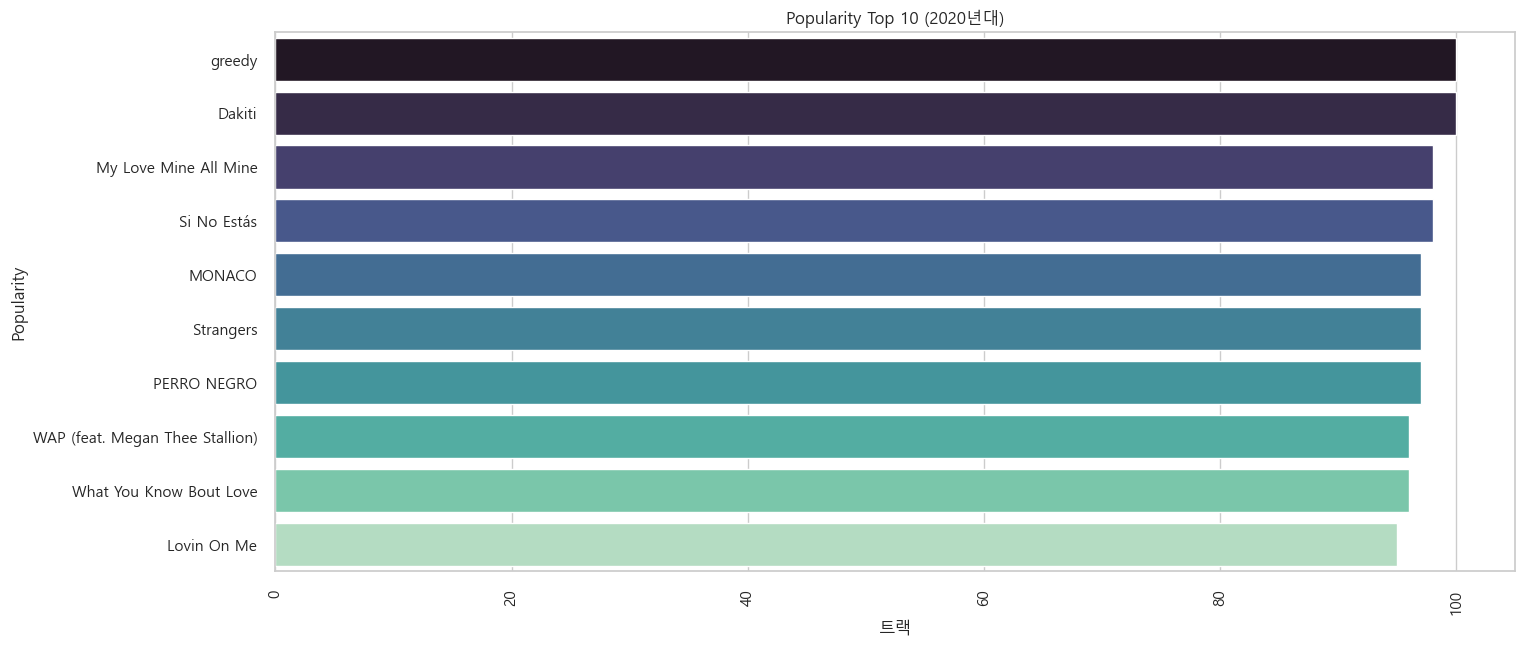

In [17]:
fig, axis = plt.subplots(figsize = (16,7))
popular = songs_2020s.groupby("name")['popularity'].mean().sort_values(ascending=False).head(10)
axis = sns.barplot(x=popular, y=popular.index, palette="mako",orient = 'h')
axis.set_title('Popularity Top 10 (2020년대)')
axis.set_ylabel('Popularity')
axis.set_xlabel('트랙')
plt.xticks(rotation = 90)

In [18]:
popular_2020s = list(songs_2020s.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15).index)
popular_alltime = list(df.groupby("name")['popularity'].mean().sort_values(ascending=False).head(15).index)

count = 0
for song in popular_2020s:
    if song in popular_alltime:
        count += 1
print(f"올타임 Popularity Top 15 곡 중 {count}개의 곡이 2020년대의 음악입니다.")

올타임 Popularity Top 15 곡 중 12개의 곡이 2020년대의 음악입니다.


#### 인기는 시간에 매우 의존적인 요소이다.
이 그래프에서는 Dakiti가 가장 높은 인기 평가를 받았지만, 이 노래는 2020년 10월 30일에 발매되었습니다. 이 데이터를 회귀분석에 사용하면 2020년대의 인기 있는 노래의 특징은 잘 나타낼 수 있지만, 이 날짜에서 멀어질수록 유효하지 않거나 관련성이 적어질 수 있습니다.

### 가장 인기 있는 아티스트 Top 10
- 여기서 **인기**는 Popularity의 총합으로 나타냄

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000')])

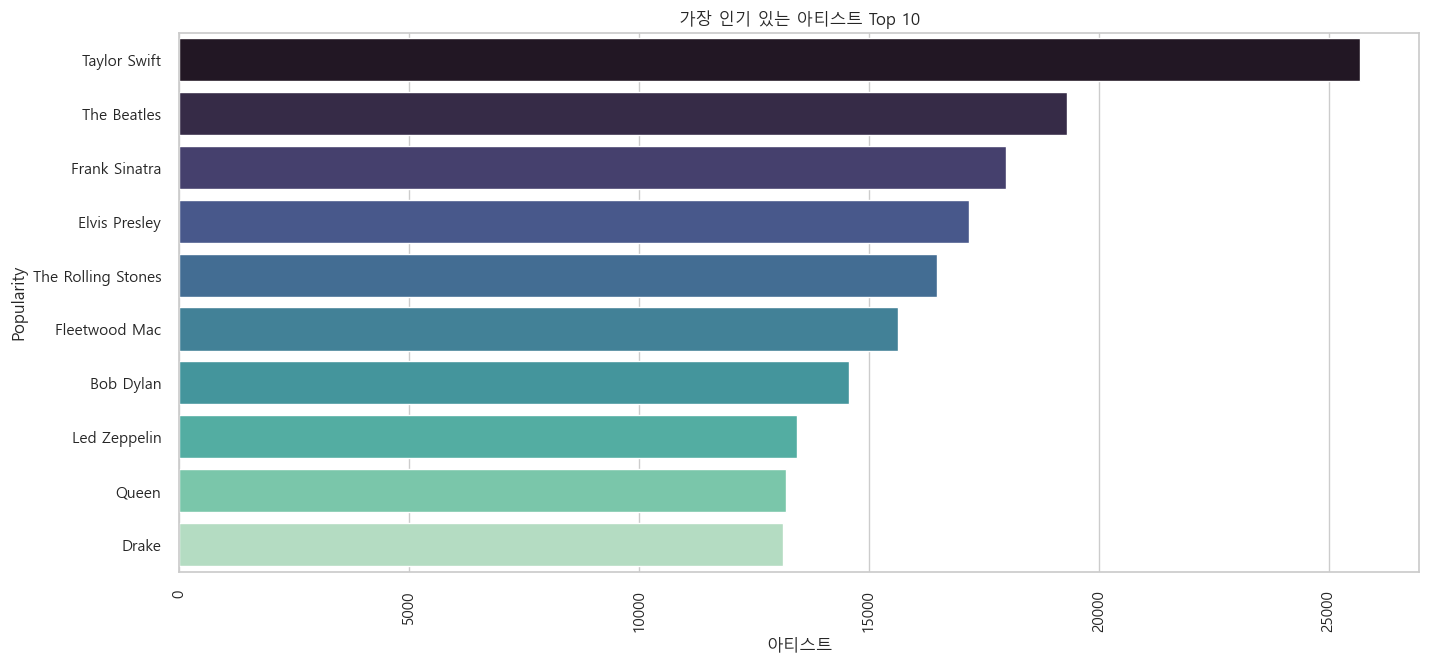

In [19]:
fig, axis = plt.subplots(figsize = (16,7))
popular = df.groupby("artists")['popularity'].sum().sort_values(ascending=False)[:10]
axis = sns.barplot(x=popular, y=popular.index, palette="mako", orient = 'h')
axis.set_title('가장 인기 있는 아티스트 Top 10')
axis.set_ylabel('Popularity')
axis.set_xlabel('아티스트')
plt.xticks(rotation = 90)

#### **테일러 스위프트가 올타임 가장 인기 많은 아티스트**임을 알 수 있다!
그럼 테일러 스위프트는 어떻게 이렇게 인기를 얻을 수 있었을까?

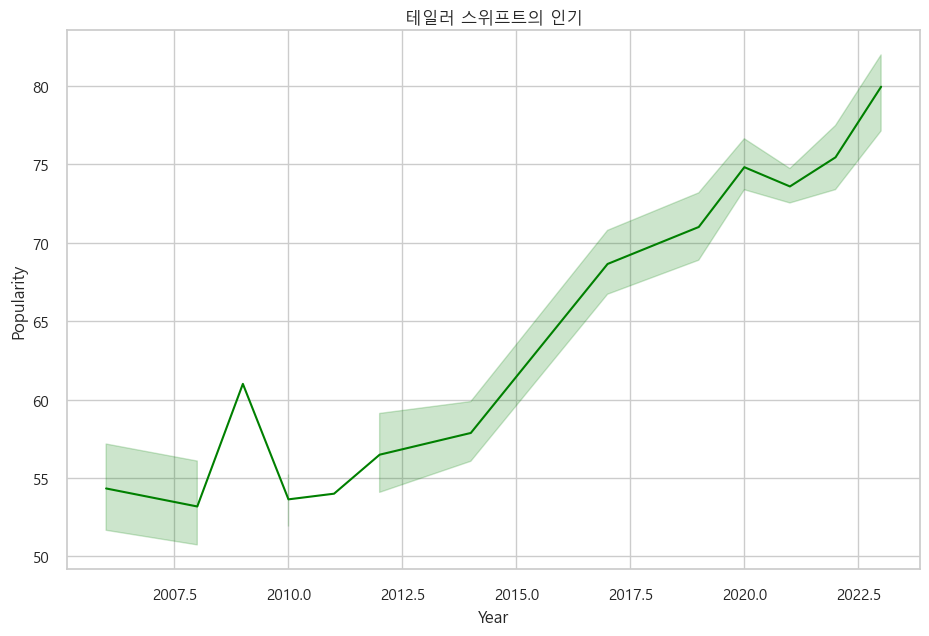

In [20]:
# 연도별 테일러 스위프트의 인기도 시각화
TaylorSwift = df[df['artists'] == 'Taylor Swift']
plt.rcParams['figure.figsize'] = (11,7)

sns.lineplot(x='year', y='popularity', data=TaylorSwift, color='green')
plt.title("테일러 스위프트의 인기")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

#### 2010년 중반을 기점으로 인기도가 급상승

### 테일러 스위프트 노래의 특징

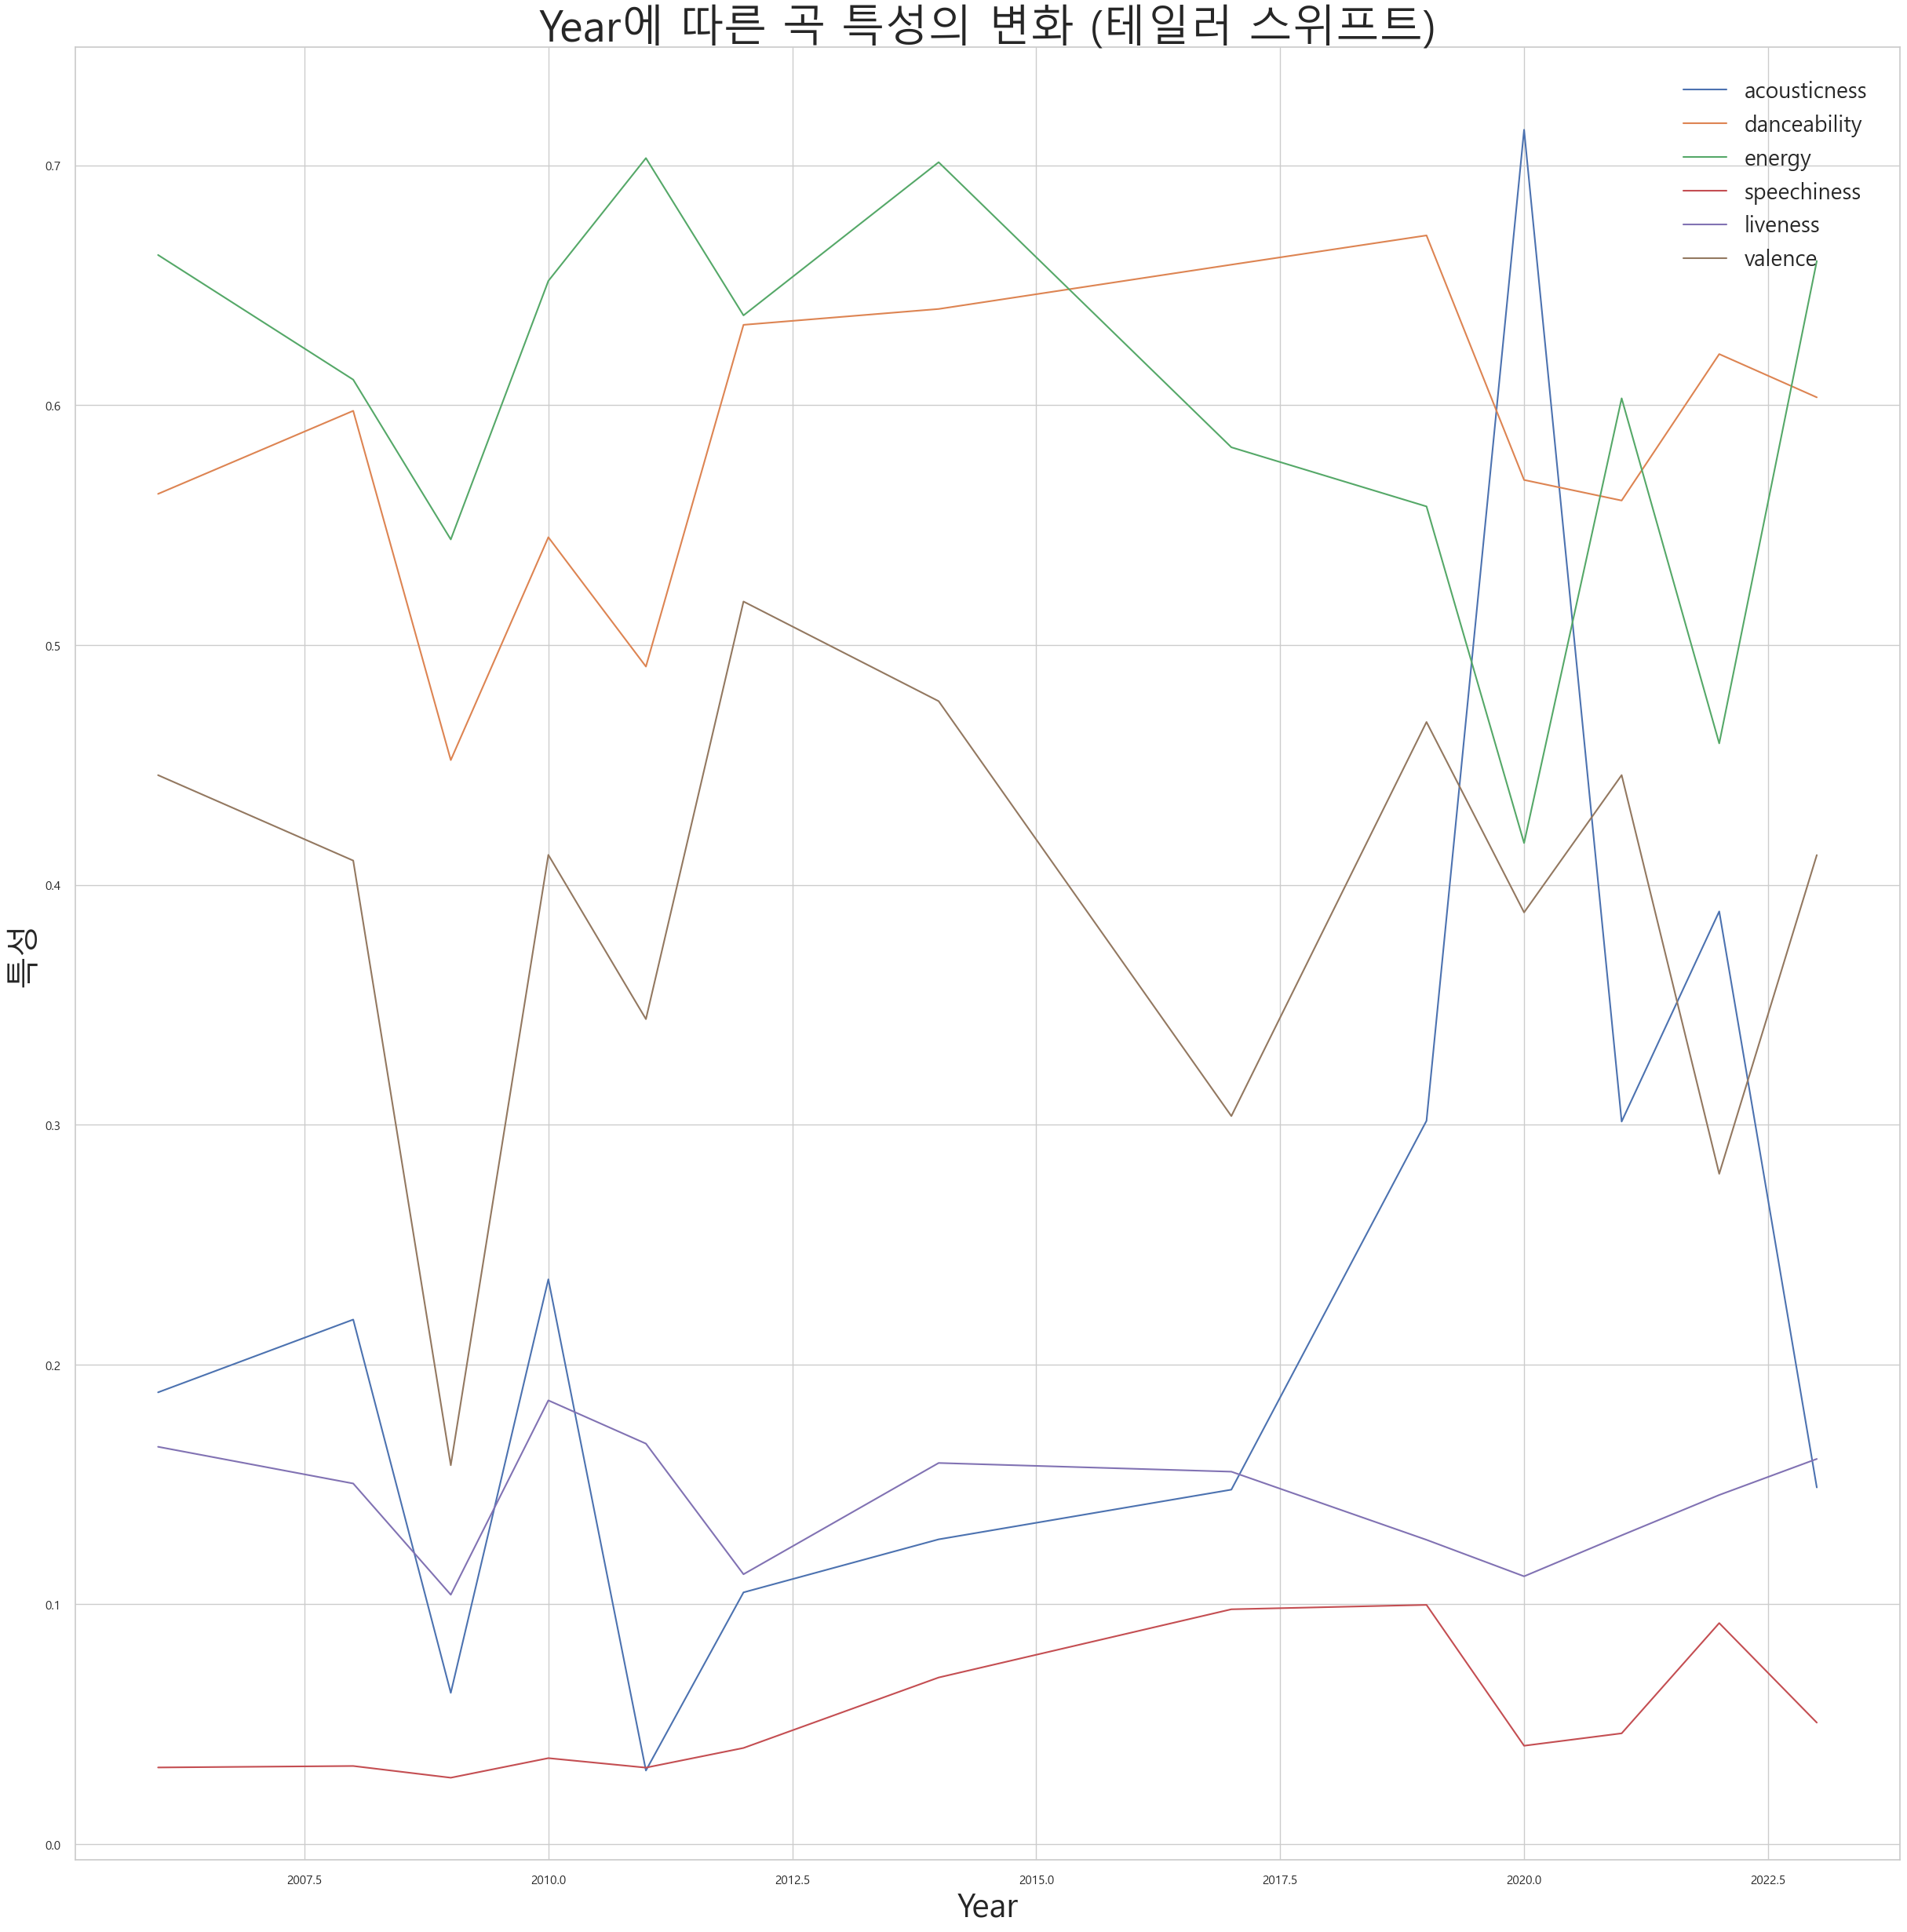

In [21]:
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
plt.figure(figsize=(30,30))
for c in columns:
    x = TaylorSwift.groupby('year')[c].mean()
    sns.lineplot(x = x.index, y=x,label=c)
plt.title('Year에 따른 곡 특성의 변화 (테일러 스위프트)', fontsize=40)
plt.xlabel('Year',fontsize=30)
plt.ylabel('특성',fontsize=30)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 20}, loc = 'upper right')
plt.show()

#### 맨 마지막 2022.5 부분을 보면, **Danceability**와 **Energy**만 높게 나타남을 알 수 있다.
**즉**, 올타임 인기가 가장 많은 <U>테일러 스위프트의 곡들의 최신 경향도 Danceability와 Energy에 치중</U>함을 알 수 있다. 

## 모델 투입 준비
### - **결정 트리** 사용  
    데이터의 관계가 단순히 선형적이지만은 않기에 선형 회귀를 사용하기에는 어려움이 있을 것.  
    결정 트리는 비슷한 곡의 분류 뿐만 아니라 회귀에서도 사용 가능하다는 장점.  
    + 데이터의 Scaling이나 특별한 전처리가 크게 필요X.  

In [22]:
# name은 모두 unique한 값을 가지므로 제거
# Song Decade는 이제 사용하지 않는 변수이므로 제거
df1 = df.drop(columns=['name', 'Song Decade'])

# 학습 데이터와 훈련 데이터로 Split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('popularity', axis=1), df1['popularity'], test_size = 0.2, random_state = 42)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(138423, 14) (34606, 14) (138423,) (34606,)


모델을 적용하기 전, artists값은 object 값을 가지므로, **해당 아티스트를 식별하는 숫자 형태로 변경**해야 함!

In [24]:
class Artists:
    def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
        self.MinCnt = MinCnt
        self.MaxCnt = MaxCnt
        self.artists_df = None

    def fit (self, X, y):
        self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
        self.artists_df.loc['unknown'] = [y.mean(), 1]
        self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
        self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
        return self

    def transform(self, X, y=None):
        X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
        X['artists'] = X['artists'].map(self.artists_df['mean'])
        return X

In [25]:
# Artists를 바꿔준 후 train과 test에 각각 피팅
artists_transformer = Artists(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

## Decision Tree Regressor Model

In [26]:
def Decision_tree(X_train,y_train,X_test,y_test,min_samples_split,max_leaf_nodes):   
    # 트리 모델을 생성한 후 피팅
    tree = DecisionTreeRegressor(max_leaf_nodes =max_leaf_nodes , min_samples_split =min_samples_split )
    tree.fit(X_train, y_train)

    # Popularity 예측 후 정확도 계산
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    train_rmse = np.sqrt(mse(y_train, y_train_pred))
    test_rmse = np.sqrt(mse(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test= r2_score(y_test, y_test_pred)

    return train_rmse, test_rmse, r2_train, r2_test, y_train_pred, y_test_pred

# 결정 트리 모델 적용
train_rmse, test_rmse, r2_train, r2_test, y_train_pred, y_test_pred = Decision_tree(X_train,y_train,X_test,y_test,min_samples_split = 200,max_leaf_nodes=167)

print("훈련 데이터 RMSE: {:.3f}".format(train_rmse))
print("학습 데이터 RMSE: {:.3f}".format(test_rmse))
print("훈련 데이터 결정 계수: {:.3f}".format(r2_train))
print("학습 데이터 결정 계수: {:.3f}".format(r2_test))

훈련 데이터 RMSE: 8.787
학습 데이터 RMSE: 9.256
훈련 데이터 결정 계수: 0.845
학습 데이터 결정 계수: 0.827


In [27]:
print(y_train_pred.shape, y_test_pred.shape)

(138423,) (34606,)


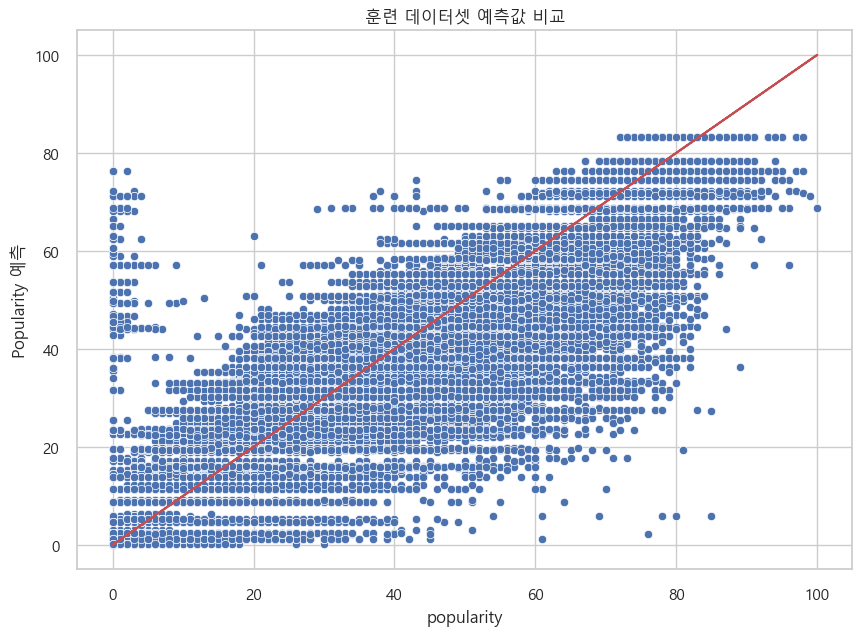

In [28]:
#y_train_pred와 y_train 데이터 비교
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_train, y=y_train_pred)
ax.plot(y_train, y_train, 'r')
ax.set_ylabel('Popularity 예측')
ax.set_title('훈련 데이터셋 예측값 비교')
plt.show()

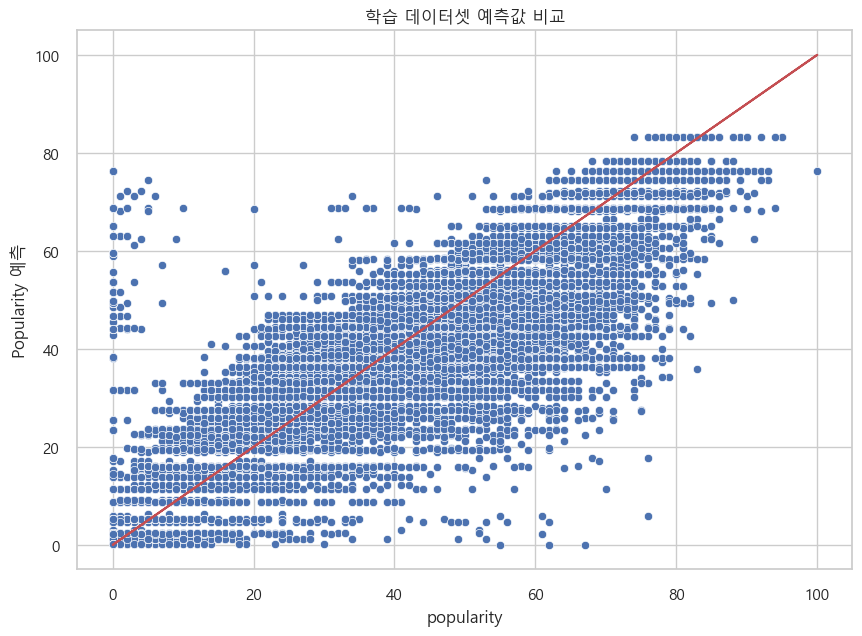

In [29]:
#y_test_pred와 y_test 데이터 비교
plt.rcParams['figure.figsize'] = (10,7)
ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.plot(y_test, y_test, 'r')
ax.set_ylabel('Popularity 예측')
ax.set_title('학습 데이터셋 예측값 비교')
plt.show()

## 모델이 얼추 잘 만들어진 모습!

#### 결국 곡의 인기는 다양한 변수들에 의해 영향을 받는다는 게 입증되었으며,  
#### 특히 **얼마나 최근에 발매되었는가, 곡이 얼마나 활기찬가, 곡이 어쿠스틱인가**에 의해서 특히 크게 영향을 받는다는 사실을 알 수 있다!

## 음악 추천
- **Kmeans Clustering 구현**   
  사용자에게 입력받은 노래의 특성을 분석하여, 최대한 비슷한 특성을 가진 집단으로 Clustering한 후 상위 n개를 출력하는 데 가장 적합한 모델.

### **Column 정규화**
K-Means에서 <U>정확한 거리를 측정하기 위해 숫자를 사용하는 컬럼은 정규화</U> 해주어야 한다.

In [30]:
def normalize_column(col):
    max_d = df[col].max()
    min_d = df[col].min()
    df[col] = (df[col] - min_d)/(max_d - min_d)

In [31]:
# 숫자 정보를 포함하는 Column을 MinMax Scaling
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = df.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

### Kmeans Clustering

In [32]:
km = KMeans(n_clusters=25)
pred = km.fit_predict(num)
df['pred'] = pred
normalize_column('pred')

In [33]:
class Song_Recommender():
    
    def __init__(self, data):
        self.data_ = data
    
    # 추천 곡을 반환하는 함수.
    # song_name: 사용자가 입력한 곡, n_top: 추천받고자 하는 곡의 개수
    def get_recommendations(self, song_name, n_top):
        distances = []
        # 사용자에게 입력받은 곡은 추천하면 안 되므로, df에서 제거한다.
        song = self.data_[(self.data_.name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                # 숫자가 아닌 변수들(id,Release date,name,artists)은 제외하고
                if not col in [1,2,16,17]:
                    # 변수들 간의 길이를 책정한다 (K-Means)
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        
        # 가장 비슷한 곡 순서로 반환
        rem_data = rem_data.sort_values('distance')
        columns = ['artists', 'name']
        return rem_data[columns][:n_top]

In [34]:
df[df['artists'] == 'Taylor Swift']

,year,artists,name,popularity,valence,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,duration_min,Song Decade,pred
16846,0.833333,Taylor Swift,Our Song,0.66,0.539,0.111446,0.676113,0.672,0.000000,0.181818,0.3290,0.862407,1.0,0.031237,0.365538,0.036234,2000s,0.291667
16874,0.833333,Taylor Swift,Teardrops On My Guitar - Radio Single Remix,0.63,0.289,0.289157,0.628543,0.417,0.000000,0.909091,0.1190,0.830929,1.0,0.023814,0.410473,0.036568,2000s,0.833333
16885,0.833333,Taylor Swift,Picture To Burn,0.62,0.821,0.173695,0.665992,0.877,0.000000,0.636364,0.0962,0.906773,1.0,0.033299,0.433606,0.031010,2000s,0.833333
16904,0.833333,Taylor Swift,Tim McGraw,0.61,0.425,0.577309,0.587045,0.491,0.000000,0.000000,0.1210,0.838431,1.0,0.025876,0.312143,0.042014,2000s,1.000000
16932,0.833333,Taylor Swift,Should've Said No,0.60,0.472,0.010341,0.481781,0.777,0.000000,0.363636,0.1960,0.880573,0.0,0.029794,0.689771,0.043904,2000s,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173308,1.000000,Taylor Swift,Castles Crumbling (feat. Hayley Williams) (Tay...,0.76,0.378,0.363454,0.582996,0.570,0.000000,0.636364,0.0668,0.815520,1.0,0.044742,0.606976,0.055685,2020s,0.250000
173312,1.000000,Taylor Swift,Electric Touch (feat. Fall Out Boy) (Taylor’s ...,0.76,0.282,0.016466,0.553644,0.855,0.000000,0.636364,0.1440,0.866025,1.0,0.061546,0.538272,0.048349,2020s,0.125000
173361,1.000000,Taylor Swift,Last Kiss (Taylor's Version),0.76,0.160,0.448795,0.556680,0.366,0.000004,0.909091,0.1010,0.807141,1.0,0.028454,0.326073,0.067356,2020s,0.291667
173367,1.000000,Taylor Swift,When Emma Falls in Love (Taylor’s Version) (Fr...,0.75,0.231,0.159639,0.479757,0.763,0.000000,0.181818,0.1380,0.867089,1.0,0.052062,0.320866,0.045793,2020s,0.291667


### Taylor Swift- Picture To Burn와 유사한 곡 10개 추천

In [35]:
recommender = Song_Recommender(df)
recommender.get_recommendations('Picture To Burn', 10) # Taylor Swift

100%|███████████████████████████████████████████████████████████████████████| 173027/173027 [00:02<00:00, 68390.01it/s]


,artists,name
56955,Morgan Wallen,Happy Hour
124228,Ed Sheeran,Nancy Mulligan
74826,LANCO,Born to Love You
72467,"Kumbia Kings, A.B. Quintanilla III, Pee Wee Go...",Sabes A Chocolate
123381,"MIKA, Ariana Grande",Popular Song
18269,Randy Houser,How Country Feels
37451,OneRepublic,Love Runs Out
72556,OV7,Shabadabada
72149,Miguel Mateos,Obsesión
16875,Muse,Supermassive Black Hole


### BTS- Dynamite와 유사한 곡 10개 추천

In [36]:
recommender.get_recommendations('Dynamite', 10) # BTS

100%|███████████████████████████████████████████████████████████████████████| 173022/173022 [00:02<00:00, 70736.65it/s]


,artists,name
36728,Bowling For Soup,Stacy's Mom
18017,One Direction,What Makes You Beautiful
17225,Lady Gaga,Poker Face
54538,Billy Talent,Fallen Leaves
18905,Little Mix,Shout Out to My Ex
18085,"Victorious Cast, Victoria Justice, Elizabeth G...",Take A Hint
107011,Glee Cast,Loser Like Me (Glee Cast Version)
17818,Hot Chelle Rae,Tonight Tonight
91698,Paramore,Rose-Colored Boy
18192,Katy Perry,Part Of Me


### The Kid LAROI, Justin Bieber - STAY와 유사한 곡 10개 추천

In [37]:
recommender.get_recommendations('STAY (with Justin Bieber)', 10)

100%|███████████████████████████████████████████████████████████████████████| 173028/173028 [00:02<00:00, 70501.65it/s]


,artists,name
170696,Cody Johnson,'Til You Can't
171671,Luke Combs,The Kind of Love We Make
171268,Cody Johnson,'Til You Can't
19616,The Weeknd,Blinding Lights
38123,"Logic, Marshmello",Everyday
172052,The Weeknd,Less Than Zero
155483,"Bad Bunny, Duki, Pablo Chill-E",Hablamos Mañana
56778,San Holo,Light
19622,"Juice WRLD, Marshmello",Come & Go (with Marshmello)
172850,Taylor Swift,I Know Places (Taylor's Version)


### LE SSERAFIM - Perfect Night와 유사한 곡 10개 추천

In [40]:
recommender.get_recommendations('Perfect Night', 10)

100%|███████████████████████████████████████████████████████████████████████| 173028/173028 [00:02<00:00, 70244.19it/s]


,artists,name
170686,Taylor Swift,You Belong With Me (Taylor’s Version)
170774,Taylor Swift,You Belong With Me (Taylor’s Version)
56242,One Direction,Wolves
171751,Dylan Scott,Good Times Go By Too Fast
172617,Conner Smith,Take It Slow
172952,Tyla,Water - Remix
172748,Taylor Swift,New Romantics (Taylor's Version)
172011,Dylan Schneider,Ain't Missin' You
19742,BLACKPINK,Lovesick Girls
171673,Post Malone,I Like You (A Happier Song) (with Doja Cat)


### IVE - After LIKE와 유사한 곡 10개 추천

In [44]:
recommender.get_recommendations('After LIKE', 10)

100%|███████████████████████████████████████████████████████████████████████| 173028/173028 [00:02<00:00, 72178.33it/s]


,artists,name
124465,TWICE,Dance The Night Away
171892,MUPP,vendetta!
17415,Lady Gaga,Bad Romance
92265,Dua Lipa,Physical
18086,Imagine Dragons,On Top Of The World
171660,OneRepublic,I Ain't Worried
108836,"IU, SUGA",eight(Prod.&Feat. SUGA of BTS)
18226,Capital Cities,Safe And Sound
172129,Alok,Deep Down (feat. Never Dull)
57167,TWICE,Feel Special


### New Jeans - Hype Boy 와 유사한 곡 10개 추천

In [45]:
recommender.get_recommendations('Hype Boy', 10)

100%|███████████████████████████████████████████████████████████████████████| 173028/173028 [00:02<00:00, 71669.43it/s]


,artists,name
74801,"YoungBoy Never Broke Again, Kevin Gates, Quand...",I Am Who They Say I Am (feat. Kevin Gates and ...
16908,"Don Omar, Tego Calderon",Bandoleros
172314,TWICE,Talk that Talk
170650,MAMAMOO,AYA
57337,"Daddy Yankee, Anuel AA, Kendo Kaponi",Don Don
171663,Yeat,Out thë way
74852,Melanie Martinez,Show & Tell
173524,TOMORROW X TOGETHER,Back for More (with Anitta)
124499,"Boyinaband, TheOdd1sOut",Life Is Fun
140543,Luke Combs,Angels Workin' Overtime
